# Pymaceuticals Inc.

### Analysis
In this study 249 mice with SCC tumors were treated with a range of drug regimens. The tumor volume was measured for each mouse over the course of 45 days. The goal of this study was to evaluate the efficacy of Pymaceuticals' medicine of interest, Capomulin, to the efficacy of other treatment regimens. 
The study concluded that Capomulin is the most effective medicine for lowering tumour volume in mice. Capomulin-treated mice also exhibited the highest survival rate and the least amount of metastatic spread.
Also, the linear regression model shows that there is a strong positive correlation between the weight of the mouse and the average tumor volume for the Capomulin regimen. The correlation coefficient is 0.84 which means that there is a strong positive correlation between the weight of the mouse and the average tumor volume for the Capomulin regimen. The r-squared value is 0.71 which means that 71% of the variability of the average tumor volume for the Capomulin regimen is explained by the linear regression model. The linear regression model shows that the average tumor volume for the Capomulin regimen increases by 0.95 mm3 for every gram increase in the weight of the mouse. Therefore, the weight of the mouse is a good predictor of the average tumor volume for the Capomulin regimen. Finally, the study revealed that Capomulin is the most effective drug for reducing tumour volume in mice.


In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [87]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice


249

In [89]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [92]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_data["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = summary_stats["Tumor Volume (mm3)"].mean()
median_tumor_volume = summary_stats["Tumor Volume (mm3)"].median()
variance_tumor_volume = summary_stats["Tumor Volume (mm3)"].var()
std_tumor_volume = summary_stats["Tumor Volume (mm3)"].std()
sem_tumor_volume = summary_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                "Median Tumor Volume": median_tumor_volume,
                                "Variance Tumor Volume": variance_tumor_volume,
                                "Standard Deviation Tumor Volume": std_tumor_volume,
                                "SEM Tumor Volume": sem_tumor_volume})
summary_stats_df







,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_stats_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

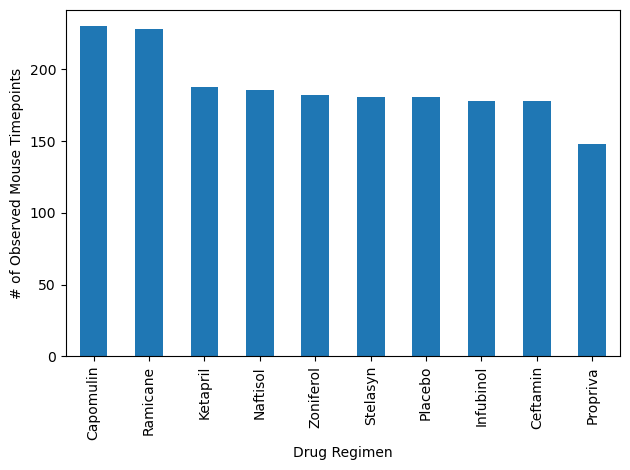

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot = clean_data["Drug Regimen"].value_counts()
bar_plot.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


                                                            

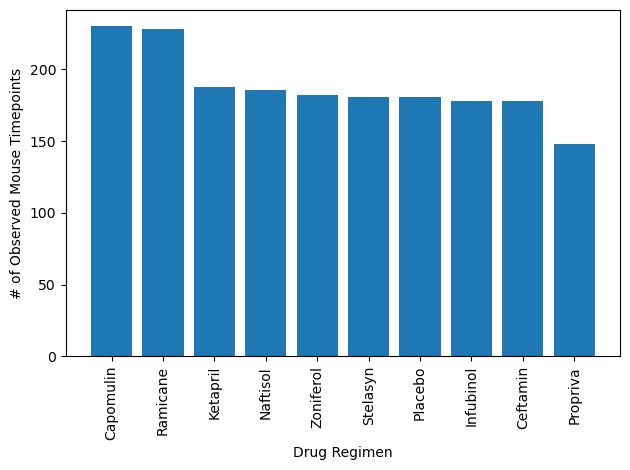

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_plot2 = clean_data["Drug Regimen"].value_counts()
x_axis = bar_plot2.index.values
plt.bar(x_axis, bar_plot2)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


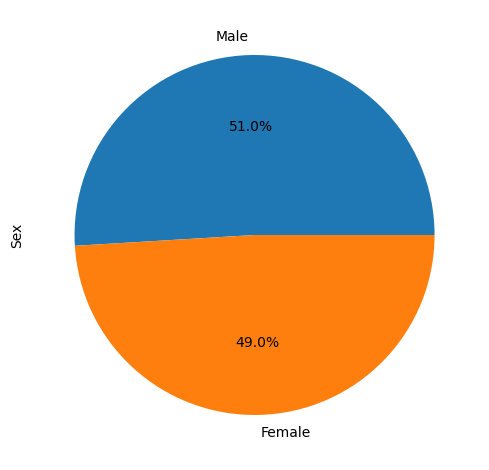

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.

gender_counts= clean_data['Sex'].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.tight_layout()
plt.show()
                                                                         

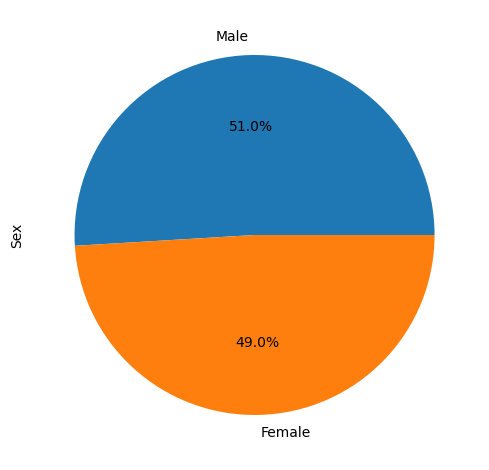

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_data['Sex'].value_counts()
labels = gender_counts.index.values
plt.pie(gender_counts, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()



## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint.
max_timepoint_df = pd.merge(max_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")




In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(final_tumor_vol)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    interquartile_range = upperq-lowerq
    lower_bound = lowerq - (1.5*interquartile_range)
    upper_bound = upperq + (1.5*interquartile_range)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


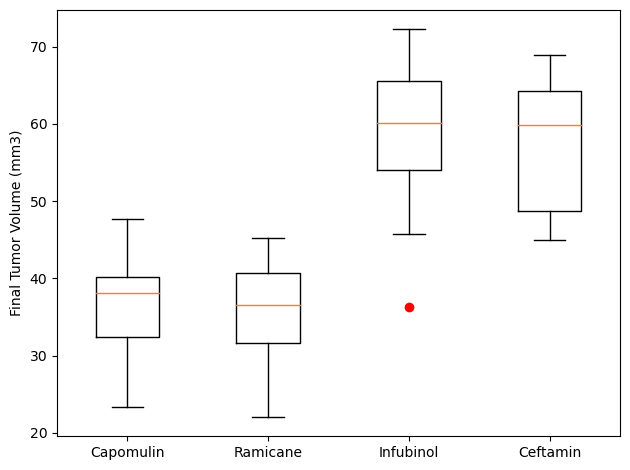

In [108]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatments, sym="r")
plt.tight_layout()
plt.show()




## Line and Scatter Plots

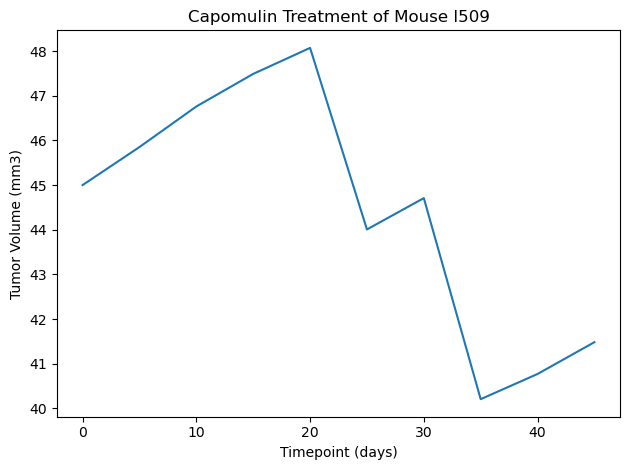

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin. capomulin treatment of mouse l509.
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_l509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.tight_layout()
plt.show()




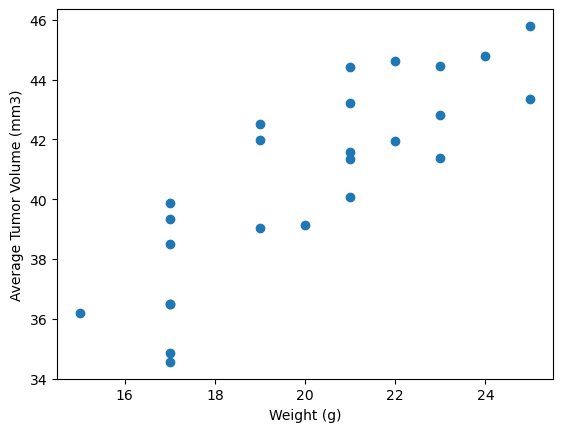

In [123]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, capomulin_avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


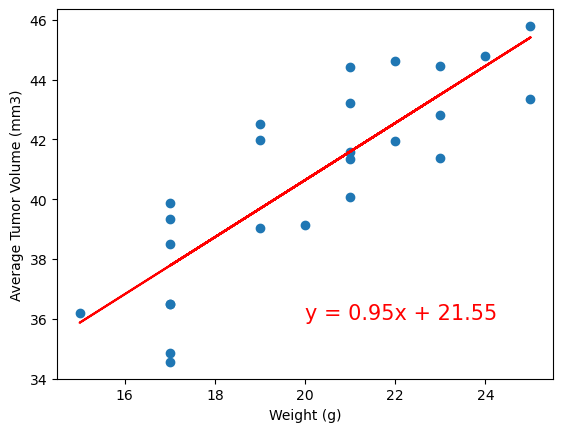

In [124]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen.
#code
correlation = st.pearsonr(mouse_weight, capomulin_avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, capomulin_avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, capomulin_avg_tumor_vol)
plt.plot(mouse_weight, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



